In [63]:
# Import Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
# read data
df=pd.read_csv('headbrain.csv')

In [65]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [66]:
# Declare dependent variable(Y) and independent variable(X) : converting the series object into array object

X=df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [67]:
#correlation
np.corrcoef(X, Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

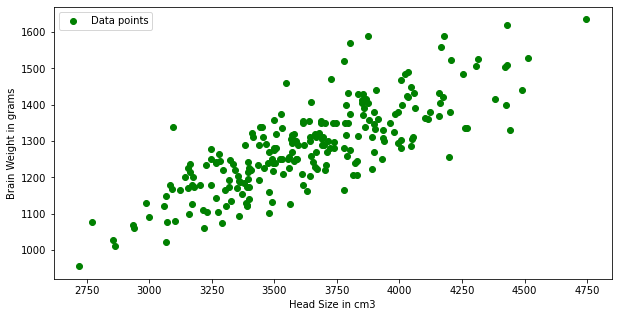

In [68]:
# Plot the Input Data
plt.scatter(X, Y, c='green', label='Data points')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

## Calculating the slope(m) and the intersection(c)

In [69]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate m and c
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
m = numerator / denominator
c = mean_y - (m * mean_x)

# Printing coefficients
print(f"coefficients for regression\nm= {m}\nc= {c}")

coefficients for regression
m= 0.26342933948939945
c= 325.57342104944223


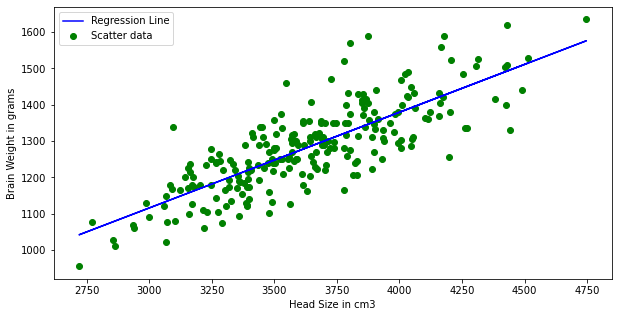

In [70]:
# Plotting Values and Regression Line
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

y = c + m * X

# Ploting Line
plt.plot(X, y, color='blue', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='green', label='Scatter data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

## Eavluate Model

### # Calculating Root Mean Squares Error

In [71]:

rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is",rmse)

Root Mean Square Error is 72.1206213783709


### Calculating R Square Score

In [72]:

ss_tot = 0 ## total sum of squares
ss_res = 0 ## total sum of squares of residuals
for i in range(n):
    y_pred = c + m* X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2

## R^2 formula : 
r2 = 1 - (ss_res/ss_tot)

print("R2 Score",r2)

R2 Score 0.6393117199570003


# Implementation with scikit learn

In [73]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [93]:
### Cannot USE RANK 1 matrix in scikit learn so reshaping needed
X_shaped = X.reshape((n,1))

### Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_shaped, y, test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(201, 1) (36, 1) (201,) (36,)


As the data is too less to train a ML model, we splitted it in 15 85 

In [94]:
### Creating model
model = LinearRegression()
model_fitted = model.fit(X_train,y_train)

In [95]:
### Prediction
y_pred = model_fitted.predict(X_test)

### Evaluation

In [96]:
mean_squared_error(y_test,y_pred)

3.446585885637615e-26

In [97]:
r2_score(y_test,y_pred)

1.0

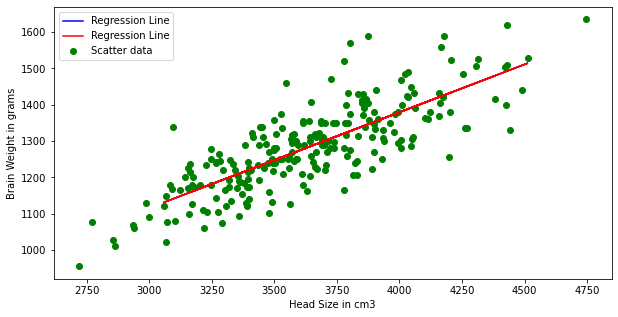

In [99]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

# Ploting Line
plt.plot(X_test, y_pred, color='blue', label='Regression Line')
plt.plot(X_test, y_test, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='green', label='Scatter data')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

Thus the accuracy is too good.